# Travel Agent AI with Chart

This notebook creates an AI travel agent using OpenAI's `gpt-4o-mini` via GitHub Models. It plans vacations and generates a bar chart for traveler data.

No Azure AI Projects here—just `openai`, `matplotlib`, and Python. Let’s make it pop! 📊

## Import the Needed Python Packages

In [1]:
import os
from openai import AsyncOpenAI
from dotenv import load_dotenv
from IPython.display import display, HTML, Image
# import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
import matplotlib.pyplot as plt

## Create the Client

We’re using [GitHub Models](https://aka.ms/ai-agents-beginners/github-models) to access `gpt-4o-mini`. Make sure your `GITHUB_TOKEN` is set in a `.env` file. You can swap `gpt-4o-mini` for another model to test different results.

In [3]:
load_dotenv()
client = AsyncOpenAI(
    api_key=os.environ.get("GITHUB_TOKEN"),
    base_url="https://models.inference.ai.azure.com/",
)

## Generate Bar Chart

We’ll create a function to generate a bar chart from traveler data using `matplotlib` and save it as a PNG.

In [4]:
def create_bar_chart(data: dict, filename: str) -> str:
    destinations = list(data.keys())
    travelers = list(data.values())

    plt.figure(figsize=(8, 6))
    plt.bar(destinations, travelers, color='#007bff')
    plt.title('Travelers by Destination')
    plt.xlabel('Destinations')
    plt.ylabel('Number of Travelers')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    output_path = Path(filename)
    plt.savefig(output_path, format='png', bbox_inches='tight')
    plt.close()
    return str(output_path)

## Run the Agent

We’ll process the user query to plan a vacation and generate a bar chart for the given data. The AI will describe the chart, and we’ll display it as an image.

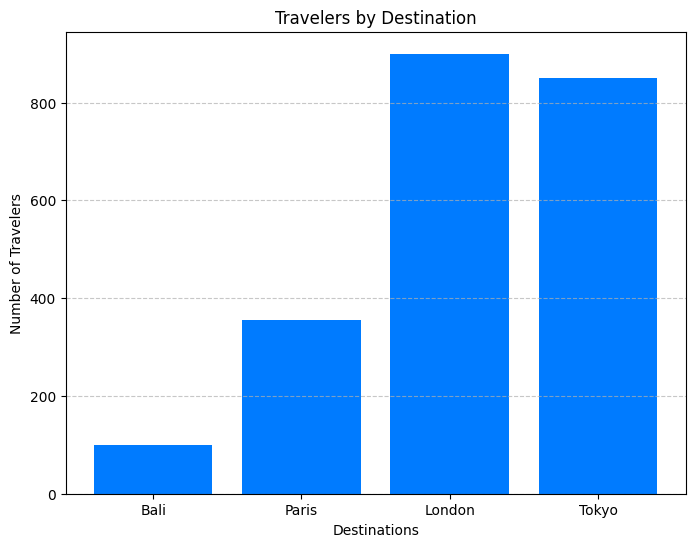

In [5]:
import matplotlib.pyplot as plt

async def run_travel_agent():
    html_output = "<h2>Travel Agent AI Execution</h2>"

    user_query = "Could you please create a bar chart for the operating profit using the following data and provide the file to me? Bali: 100 Travelers, Paris: 356 Travelers, London: 900 Travelers, Tokyo: 850 Travellers"

    # Display user query
    html_output += "<div style='margin:15px 0; padding:10px; background-color:#f5f5f5; border-left:4px solid #007bff; border-radius:4px;'>"
    html_output += "<strong>User:</strong><br>"
    html_output += f"<div style='margin-left:15px'>{user_query}</div>"
    html_output += "</div>"

    # Show processing message
    display(HTML(html_output + "<div style='color:#007bff'><i>Processing request...</i></div>"))

    # Extract data and generate chart
    data = {
        "Bali": 100,
        "Paris": 356,
        "London": 900,
        "Tokyo": 850
    }
    chart_filename = "travelers_chart.png"
    chart_path = create_bar_chart(data, chart_filename)

    # Get AI response
    system_prompt = "You are a helpful travel agent. Describe the provided traveler data and the generated bar chart."
    prompt = f"{user_query}\nThe bar chart has been generated and saved as '{chart_filename}'. Describe the chart and the data."

    response = await client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,
        max_tokens=500
    )
    ai_response = response.choices[0].message.content

    # Format response
    html_output += "<div style='margin:15px 0; padding:10px; background-color:#f0f7ff; border-left:4px solid #28a745; border-radius:4px;'>"
    html_output += "<strong>Assistant:</strong><br>"
    html_output += f"<div style='margin-left:15px; white-space:pre-wrap'>{ai_response}</div>"
    html_output += "</div>"

    # Add chart info
    html_output += f"<div style='margin-top:10px'><strong>Generated Chart:</strong> {chart_filename}</div>"

    # Final display
    display(HTML(html_output))
    display(Image(chart_path))

await run_travel_agent()